<h2 style='text-align: center'>Watermarking Jupyter Notebooks</h2>
<h3 style='text-align: center'>Base64 Encoding a PNG file</h3>
<hr style='border-color: black;border-width: 1px'/>
In [my first attempt to watermark a notebook](./traditional_image_file.ipynb), I took the conventional approach of creating an image file of my watermark and then loading it as a background image in my notebook's style section.  I noted, though, that the watermark is easily removed by simply tossing away the image file.  In this approach, I go one step further by first base64 encoding my image file and then loading the encoding in as the background image.  

This notebook shows both the base64 encoding step as well as the step of loading the base64 string into the stylesheet.  If I were to really move forward with this approach, I'd want to base64 my image file outside of this notebook then grab that encoded string and concatenate it with the other portion of my style markup.

This solution solves my portability problem, but I still see a few other problems with it:
1. Again, I still have a visible cell in the notebook dedicated not to the problem the notebook is trying to solve, but instead to merely styling the notebook.  I'm sure there are ways to hide cells like these, I'll just have to do more research; however, I could always shove the markup in a [global custom.css](http://sherifsoliman.com/2016/01/11/theming-ipython-jupyter-notebook/).
1. That base64 string is huge!  It won't be very fun to concatenate the explicit string to the rest of my style section like I'd need to do to make the notebook watermark truly portable.  Plus, if I ever want to change the watermark, I'd have to go through more work to base64 encode the new image.  Surely, there's still a [more elegant way to solve this problem](./svg_example.ipynb)!


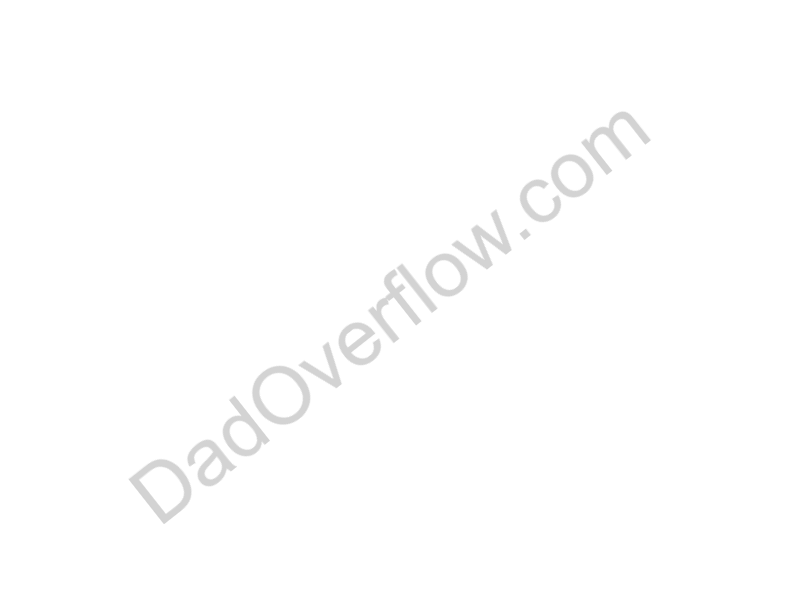

In [1]:
import base64
from IPython.core.display import HTML


with open('dadoverflow_wm.png', 'rb') as f:
    encoded_string = base64.b64encode(f.read()).decode()
    
image_url = 'data:image/png;base64,{0}'.format(encoded_string)
HTML('<style type="text/css">'
    'div#notebook {'
    'background-image: url("' + image_url + '");'
    'background-repeat: repeat;}'
    '</style>')